In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
urldata=pd.read_csv("data - copy.csv")
# urldata1=pd.DataFrame(urldata,)

In [28]:
urldata.head()

,Unnamed: 0,url,label
0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,2,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,3,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,4,mail.printakid.com/www.online.americanexpress....,1
4,5,thewhiskeydregs.com/wp-content/themes/widescre...,1


In [31]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']==0])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']==1])/len(urldata['label'])*100))
urldata.info()

Percent Of Malicious URLs:50.06 %
Percent Of Benign URLs:49.94 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  95911 non-null  int64 
 1   url         95911 non-null  object
 2   label       95911 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ MB


Text(0, 0.5, 'Number Of URLs')

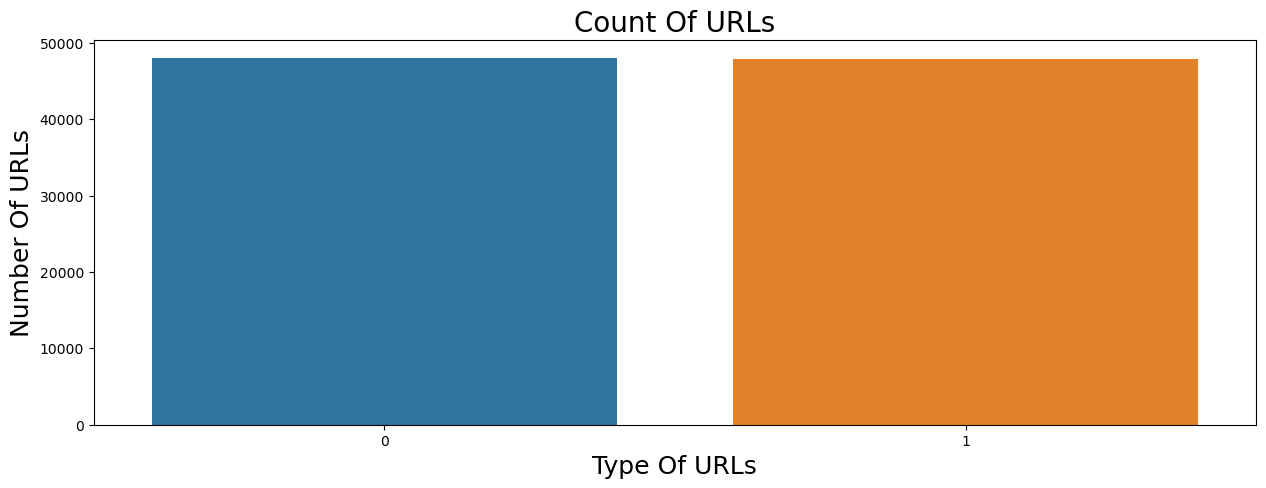

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Classifiers And Feature Extraction

In [33]:
from urllib.parse import urlparse
from tld import get_tld
import os
import os.path

In [34]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [35]:
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [37]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [38]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [46]:
# urldata.drop()
# urldata.head()
urldata.tail()

,Unnamed: 0,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
95906,95907,xbox360.ign.com/objects/850/850402.html,0,39,0,39,7,None,-1,0,...,0,0,3,0,0,0,0,12,21,3
95907,95908,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,44,0,44,8,None,-1,2,...,0,0,2,0,0,0,0,7,29,4
95908,95909,www.gamespot.com/xbox360/action/deadspace/,0,42,0,42,7,None,-1,0,...,0,0,2,0,0,0,1,3,33,4
95909,95910,en.wikipedia.org/wiki/Dead_Space_(video_game),0,45,0,45,4,None,-1,0,...,0,0,2,0,0,0,0,0,36,2
95910,95911,www.angelfire.com/goth/devilmaycrytonite/,0,41,0,41,4,None,-1,0,...,0,0,2,0,0,0,1,0,36,3


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

In [49]:
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]
y = urldata['label']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [51]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

c:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7700110220739372

In [52]:
print(confusion_matrix(y_test,log_predictions))

[[28821  4733]
 [10708 22876]]


In [53]:
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
logreg=LogisticRegression(max_iter=100000)
kf=KFold(n_splits=10)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.77797081 0.76407227 0.7647672  0.76885645 0.77128954 0.76955162
 0.77024678 0.77094195 0.76607577 0.77372263]
Average Cross Validation score :0.7697495025969787


In [54]:
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
logreg=RandomForestClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.87456567 0.87178596 0.87560806 0.86305179 0.87904067 0.88077859
 0.880431   0.87243657 0.8717414  0.87208898]
Average Cross Validation score :0.874152868971351


In [59]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)
# print(confusion_matrix(y_test,rfc_predictions))


0.8744526199767643

In [60]:
print(confusion_matrix(y_test,rfc_predictions))

[[29900  3654]
 [ 4775 28809]]


In [67]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape for the CNN
input_shape = (0,15)

# Define the CNN architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 0, 15)

In [64]:
model.fit(x_train, y_train,
          epochs=20,
          batch_size= 160)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\hi\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hi\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hi\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hi\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\hi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\hi\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 15)
